In [ ]:
# 練習13-1傅立葉級數
import numpy as np
from matplotlib import pyplot as plt

# x 軸
x = np.linspace(0, 8*np.pi, 500)

# 三種正弦波
ysin1 = np.sin(x)
ysin3 = np.sin(3*x)
ysin5 = np.sin(5*x)

# 加總
y = ysin1 + ysin3 + ysin5

# 畫圖
plt.figure("三種正弦波與加總", figsize=(10,8))

plt.subplot(4,1,1)
plt.plot(x, ysin1)
plt.title("sin(x)")
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(x, ysin3)
plt.title("sin(3x)")
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(x, ysin5)
plt.title("sin(5x)")
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(x, y)
plt.title("y = sin(x) + sin(3x) + sin(5x)")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# 練習13-2 二維傅立葉離散範例
# original to np.fft.fft2(img) to 頻譜 to np.fft.fftshift(f)低頻在正中央
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 讀取圖像
img = cv2.imread('C:\\img\\lena.bmp', 0)

# 傅立葉轉換
f = np.fft.fft2(img)
# print("FFT2 結果形狀:", f.shape)
# print("FFT2 結果類型:", f.dtype)

# 將低頻移到中心
fshift = np.fft.fftshift(f)

# 計算頻譜（取絕對值並轉換為對數尺度）
magnitude_spectrum = 20*np.log(np.abs(f) + 1)
magnitude_spectrum_shifted = 20*np.log(np.abs(fshift) + 1)

# 顯示結果
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FFT Spectrum')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(magnitude_spectrum_shifted, cmap='gray')
plt.title('FFT Shifted Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 練習13-3 反二維傅立葉離散範例
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 讀取圖像
img = cv2.imread('C:\\img\\boat.bmp', 0)  # 0 表示灰階讀取

# 傅立葉轉換
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# 顯示原圖與頻譜圖
plt.figure(figsize=(12, 8))

plt.subplot(2,2,1),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'),plt.axis('off')

plt.subplot(2,2,2),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'),plt.axis('off')

# 反傅立葉轉換
ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)

plt.subplot(2,2,3),plt.imshow(iimg, cmap = 'gray')
plt.title('Inverse FFT'),plt.axis('off')

# 顯示 ifftshift 的頻譜
magnitude_spectrum_ishift = 20*np.log(np.abs(ishift))
plt.subplot(2,2,4),plt.imshow(magnitude_spectrum_ishift, cmap = 'gray')
plt.title('After ifftshift'),plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 練習13-4 傅立葉低通濾波器
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 讀取圖像
img = cv2.imread('C:\\img\\lena.bmp', 0)

# 傅立葉轉換
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# 創建低通濾波器遮罩（保留中心低頻，過濾掉高頻）
rows, cols = img.shape
crow, ccol = rows//2, cols//2  # 中心點

# 創建遮罩，初始全為0（黑色，過濾掉所有頻率）
mask = np.zeros((rows, cols), np.uint8)

# 設定保留的低頻區域大小（中心方形區域）
radius = 30  # 可調整此值來控制保留的低頻範圍
mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1

# 應用遮罩（高頻被塗黑）
fshift_filtered = fshift * mask

# 計算頻譜
magnitude_spectrum_original = 20*np.log(np.abs(fshift) + 1)
magnitude_spectrum_filtered = 20*np.log(np.abs(fshift_filtered) + 1)

# 反傅立葉轉換
ishift = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(ishift)
img_filtered = np.abs(img_filtered)

# 顯示結果
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(magnitude_spectrum_original, cmap='gray')
plt.title('Original Spectrum')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(mask*255, cmap='gray')
plt.title('Low-Pass Filter Mask')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Filtered Spectrum (High Freq Blocked)')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image (Low-Pass)')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"保留的低頻區域大小: {radius*2} x {radius*2}")

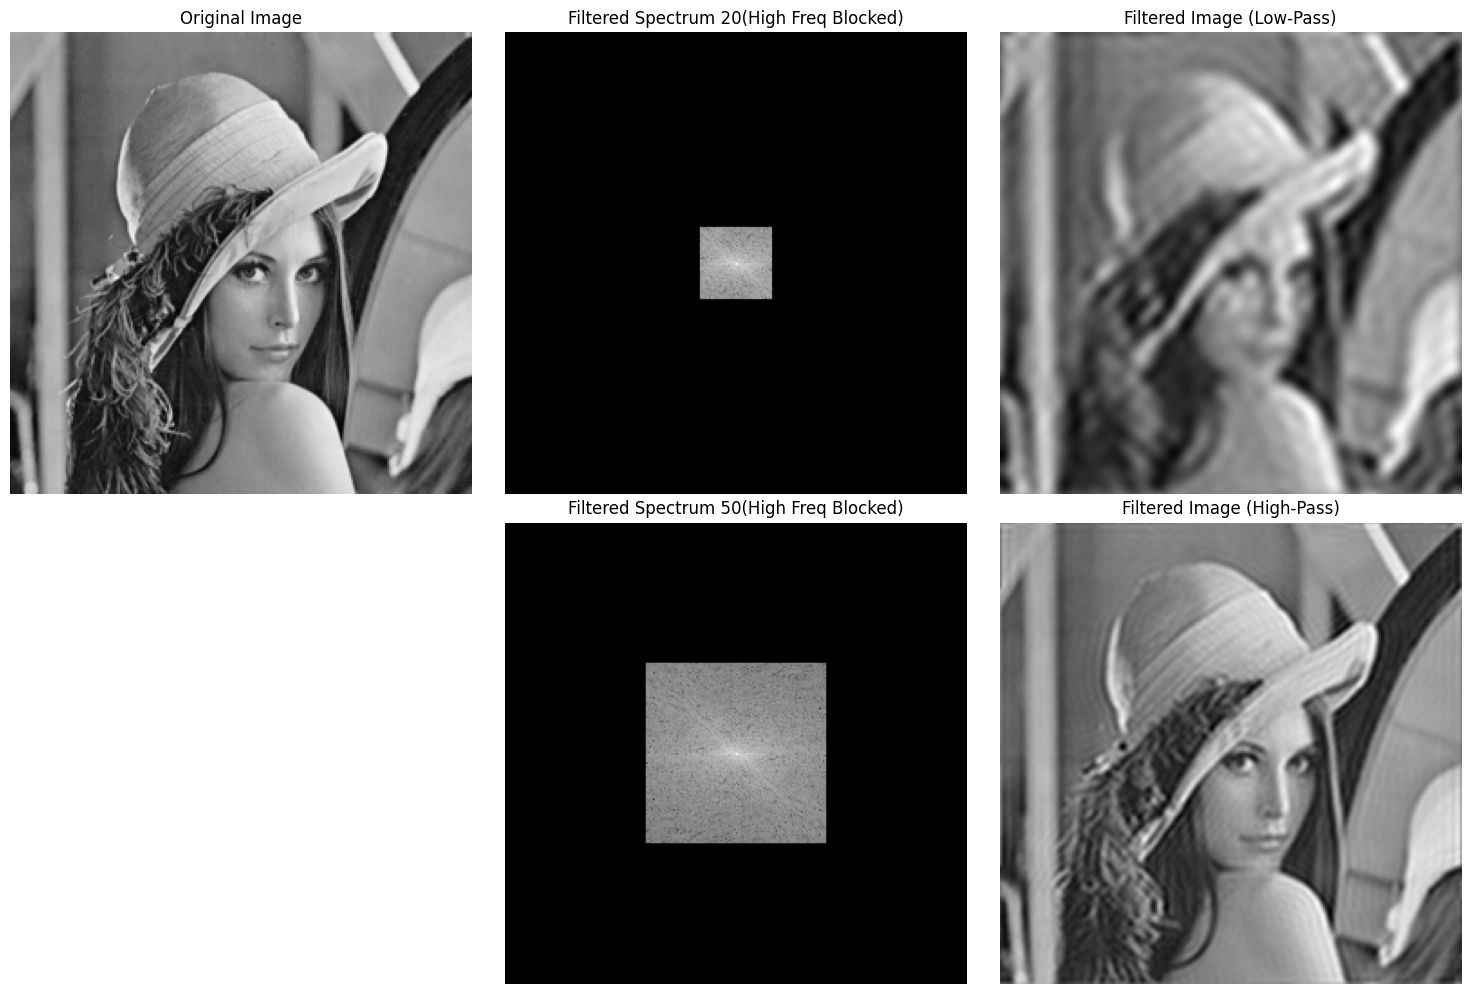

In [3]:
# 練習13-5
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 讀取圖像
img = cv2.imread('C:\\img\\lena.bmp', 0)

# 傅立葉轉換
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# 創建低通濾波器遮罩（保留中心低頻，過濾掉高頻）
rows, cols = img.shape
crow, ccol = rows//2, cols//2  # 中心點

# 創建遮罩，初始全為0（黑色，過濾掉所有頻率）
mask = np.zeros((rows, cols), np.uint8)
mask2 = np.zeros((rows, cols), np.uint8)
# 設定保留的低頻區域大小（中心方形區域）
radius = 20  # 可調整此值來控制保留的低頻範圍
mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
radius = 50  # 可調整此值來控制保留的低頻範圍
mask2[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1

# 應用遮罩（高頻被塗黑）
fshift_filtered = fshift * mask

# 計算頻譜
magnitude_spectrum_original = 20*np.log(np.abs(fshift) + 1)
magnitude_spectrum_filtered = 20*np.log(np.abs(fshift_filtered) + 1)
magnitude_spectrum_filtered2 = 20*np.log(np.abs(fshift * mask2) + 1)

# 反傅立葉轉換
ishift = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(ishift)
img_filtered = np.abs(img_filtered)

# 反傅立葉轉換
ishift = np.fft.ifftshift(fshift * mask2)
img_filtered2 = np.fft.ifft2(ishift)
img_filtered2 = np.abs(img_filtered2)

# 顯示結果
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(magnitude_spectrum_filtered2, cmap='gray')
plt.title('Filtered Spectrum 50(High Freq Blocked)')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(img_filtered2, cmap='gray')
plt.title('Filtered Image (High-Pass)')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Filtered Spectrum 20(High Freq Blocked)')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image (Low-Pass)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 練習13-6 傅立葉高通濾波器
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 讀取圖像
img = cv2.imread('C:\\img\\lena.bmp', 0)

# 傅立葉轉換
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# 創建低通濾波器遮罩（保留中心低頻，過濾掉高頻）
rows, cols = img.shape
crow, ccol = rows//2, cols//2  # 中心點

# 創建遮罩，初始全為1（白色，保留所有頻率）
mask = np.ones((rows, cols), np.uint8)

# 設定保留的低頻區域大小（中心方形區域）
radius = 15  # 可調整此值來控制保留的低頻範圍
mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0
# 應用遮罩（高頻被塗黑）
fshift_filtered = fshift * mask

# 計算頻譜
magnitude_spectrum_original = 20*np.log(np.abs(fshift) + 1)
magnitude_spectrum_filtered = 20*np.log(np.abs(fshift_filtered) + 1)

# 反傅立葉轉換
ishift = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(ishift)
img_filtered = np.abs(img_filtered)

# 顯示結果
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(magnitude_spectrum_original, cmap='gray')
plt.title('Original Spectrum')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(mask*255, cmap='gray')
plt.title('Low-Pass Filter Mask')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Filtered Spectrum (High Freq Blocked)')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image (Low-Pass)')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"保留的低頻區域大小: {radius*2} x {radius*2}")

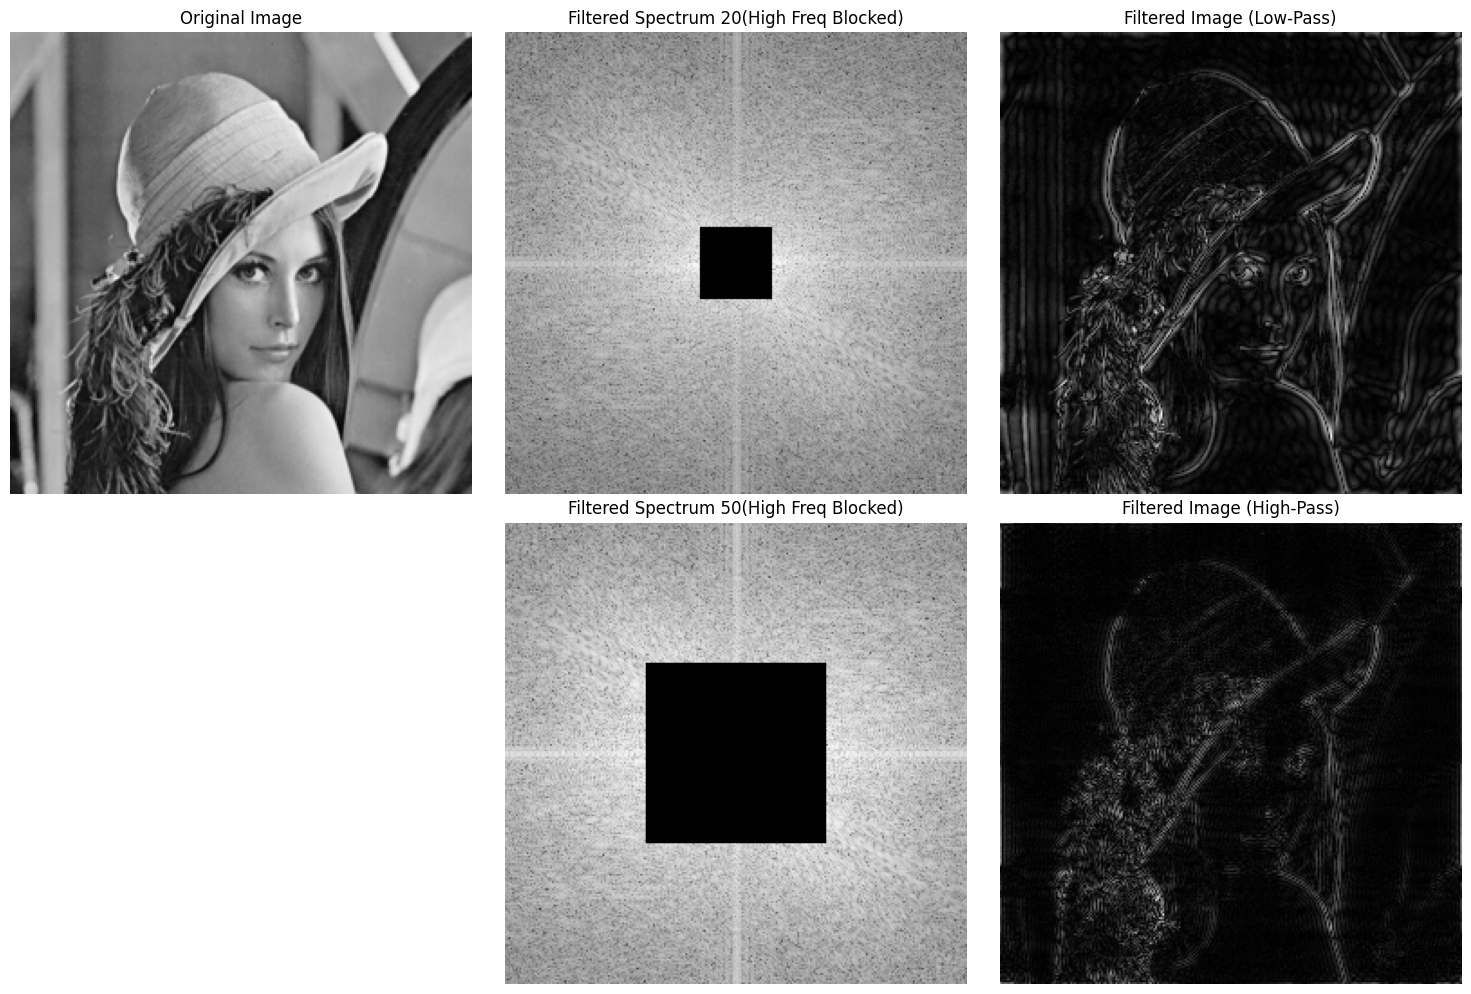

In [ ]:
# 練習13-7
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 讀取圖像
img = cv2.imread('C:\\img\\lena.bmp', 0)

# 傅立葉轉換
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# 創建低通濾波器遮罩（保留中心低頻，過濾掉高頻）
rows, cols = img.shape
crow, ccol = rows//2, cols//2  # 中心點

# 創建遮罩，初始全為0（黑色，過濾掉所有頻率）
mask = np.ones((rows, cols), np.uint8)
mask2 = np.ones((rows, cols), np.uint8)
# 設定保留的低頻區域大小（中心方形區域）
radius = 20  # 可調整此值來控制保留的低頻範圍
mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0
radius = 50  # 可調整此值來控制保留的低頻範圍
mask2[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0

# 應用遮罩（高頻被塗黑）
fshift_filtered = fshift * mask

# 計算頻譜
magnitude_spectrum_original = 20*np.log(np.abs(fshift) + 1)
magnitude_spectrum_filtered = 20*np.log(np.abs(fshift_filtered) + 1)
magnitude_spectrum_filtered2 = 20*np.log(np.abs(fshift * mask2) + 1)

# 反傅立葉轉換
ishift = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(ishift)
img_filtered = np.abs(img_filtered)

# 反傅立葉轉換
ishift = np.fft.ifftshift(fshift * mask2)
img_filtered2 = np.fft.ifft2(ishift)
img_filtered2 = np.abs(img_filtered2)

# 顯示結果
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(magnitude_spectrum_filtered2, cmap='gray')
plt.title('Filtered Spectrum 50(High Freq Blocked)')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(img_filtered2, cmap='gray')
plt.title('Filtered Image (High-Pass)')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Filtered Spectrum 20(High Freq Blocked)')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image (Low-Pass)')
plt.axis('off')

plt.tight_layout()
plt.show()